# Keras tutorial - the Happy House

In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [5]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [8]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('data/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('data/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [9]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


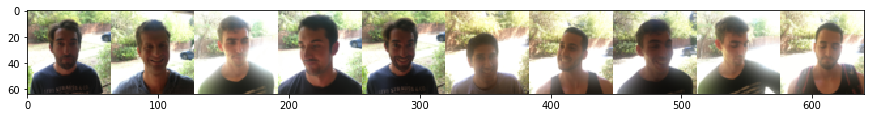

In [10]:
# Show training images
np.random.seed(49)

concat_img = None
for i in range(10):
    idx = np.random.randint(X_train.shape[0])
    if concat_img is None:
        concat_img = X_train[idx]
    else:
        concat_img = np.concatenate([concat_img, X_train[idx]], axis=1)
plt.figure(figsize=(15, 5)) 
imshow(concat_img)

In [11]:
np.random.randint(20)

1

In [12]:
concat_img.shape

(64, 640, 3)

In [13]:
### Building CNN models using Keras
# Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
X_input = Input(X_train.shape[1:])

# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)

# CONV -> BN -> RELU Block applied to X
X1 = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
X2 = BatchNormalization(axis = 3, name = 'bn0')(X1)
X3 = Activation('relu')(X2)
    
# MORE CONVS
X4 = MaxPooling2D((2, 2))(X3)
X5 = Conv2D(32, (3, 3), strides = (1, 1), padding="same")(X4)
X6 = BatchNormalization()(X5)
X7 = Activation('relu')(X6)
X8 = Conv2D(32, (3, 3), strides = (1, 1), padding="same")(X7)
X9 = BatchNormalization()(X8)
X10 = Activation('relu')(X9)

# MAXPOOL
X11 = MaxPooling2D((2, 2), name='max_pool')(X10)

# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X12 = Flatten()(X11)
    
# MORE DENSE
X13 = Dense(128)(X12)
X14 = BatchNormalization()(X13)
X15 = Activation('relu')(X14)
X16 = Dropout(0.5)(X15)
    
X17 = Dense(1, activation='sigmoid', name='fc')(X16)

# Create model. 
model = Model(inputs = X_input, outputs = X17, name='HappyModel')

### Optimizing
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

### Train model
model.fit(X_train, Y_train, epochs=5, batch_size=16, validation_data=(X_test, Y_test))

Train on 600 samples, validate on 150 samples
Epoch 1/5
600/600 [==============================] - 36s 60ms/step - loss: 0.3706 - acc: 0.8383 - val_loss: 0.3705 - val_acc: 0.8133
Epoch 2/5
600/600 [==============================] - 33s 56ms/step - loss: 0.2037 - acc: 0.9250 - val_loss: 0.2037 - val_acc: 0.9533
Epoch 3/5
600/600 [==============================] - 34s 57ms/step - loss: 0.1673 - acc: 0.9317 - val_loss: 0.6070 - val_acc: 0.6200
Epoch 4/5
600/600 [==============================] - 35s 59ms/step - loss: 0.1434 - acc: 0.9550 - val_loss: 0.3978 - val_acc: 0.7467
Epoch 5/5
600/600 [==============================] - 37s 61ms/step - loss: 0.1135 - acc: 0.9650 - val_loss: 0.2252 - val_acc: 0.8867


In [14]:
print(X_train.shape)
print(Y_train.shape)
print(Y_train[:10])
print(X_input.shape)
print(X_train.shape[1:])
print(X)
print("X : ", X)
print("X1 : ", X1)
print("X2 : ", X2)
print("X3 : ", X3)
print("X4 : ", X4)
print("X5 : ", X5)
print("X6 : ", X6)
print("X7 : ", X7)
print("X8 : ", X8)
print("X9 : ", X9)
print("X10 : ", X10)
print("X11 : ", X11)
print("X12 : ", X12)
print("X13 : ", X13)
print("X14 : ", X14)
print("X15 : ", X15)
print("X16 : ", X16)
print("X17 : ", X17)
print(model.summary())

(600, 64, 64, 3)
(600, 1)
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
(?, 64, 64, 3)
(64, 64, 3)
Tensor("zero_padding2d_1/Pad:0", shape=(?, 70, 70, 3), dtype=float32)
X :  Tensor("zero_padding2d_1/Pad:0", shape=(?, 70, 70, 3), dtype=float32)
X1 :  Tensor("conv0/BiasAdd:0", shape=(?, 64, 64, 32), dtype=float32)
X2 :  Tensor("bn0/cond/Merge:0", shape=(?, 64, 64, 32), dtype=float32)
X3 :  Tensor("activation_1/Relu:0", shape=(?, 64, 64, 32), dtype=float32)
X4 :  Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 32, 32, 32), dtype=float32)
X5 :  Tensor("conv2d_1/BiasAdd:0", shape=(?, 32, 32, 32), dtype=float32)
X6 :  Tensor("batch_normalization_1/cond/Merge:0", shape=(?, 32, 32, 32), dtype=float32)
X7 :  Tensor("activation_2/Relu:0", shape=(?, 32, 32, 32), dtype=float32)
X8 :  Tensor("conv2d_2/BiasAdd:0", shape=(?, 32, 32, 32), dtype=float32)
X9 :  Tensor("batch_normalization_2/cond/Merge:0", shape=(?, 32, 32, 32), dtype=float32)
X10 :  Tensor("activation_3/Relu:0", shape=(?, 32, 32, 32)

In [15]:
### Evaludate the model
preds = model.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 5s 31ms/step

Loss = 0.22524324814478555
Test Accuracy = 0.8866666706403097


[[1.]]


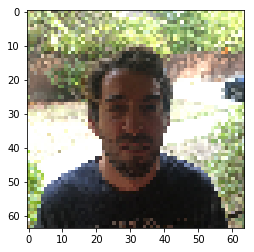

In [16]:
### Predict using the trained model
img_path = 'images/my_image.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x2 = np.expand_dims(x, axis=0)
x3 = preprocess_input(x2)

print(model.predict(x3))